In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, prepare_sequences
from lstm_model import get_data, train_model
import matplotlib.pyplot as plt

# File: **lstm_normalize**

#### For **prepare_data** function

In [3]:
data = prepare_data()

In [4]:
data

,Open,High,Low,Close,Date
0,0.186024,0.184788,0.181568,0.183161,2000-01-03
1,0.182720,0.179410,0.171936,0.170036,2000-01-04
2,0.169580,0.169507,0.167289,0.170668,2000-01-05
3,0.170213,0.169183,0.170682,0.170984,2000-01-06
4,0.170529,0.176164,0.172713,0.179927,2000-01-07
...,...,...,...,...,...
6053,0.990762,0.992223,0.988956,0.992057,2024-01-25
6054,0.991292,0.994240,0.991811,0.991306,2024-01-26
6055,0.992243,0.999580,0.993206,1.000000,2024-01-29
6056,1.000000,1.000000,1.000000,0.999304,2024-01-30


In [5]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Date     datetime64[ns]
dtype: object

#### For **prepare_sequences** function

In [6]:
x, y = prepare_sequences(data)

In [7]:
x

array([[Timestamp('2000-01-10 00:00:00'), 0.18372063776093983],
       [Timestamp('2000-01-11 00:00:00'), 0.17924213271879924],
       [Timestamp('2000-01-12 00:00:00'), 0.1777579020238909],
       ...,
       [Timestamp('2024-01-29 00:00:00'), 1.0],
       [Timestamp('2024-01-30 00:00:00'), 0.9993037679739585],
       [Timestamp('2024-01-31 00:00:00'), 0.9806463116614557]],
      dtype=object)

In [8]:
y

array([[0.18602366, 0.18478831, 0.1815681 , ..., 0.17616423, 0.1727129 ,
        0.17992659],
       [0.18271985, 0.17941036, 0.17193635, ..., 0.18156815, 0.18229995,
        0.18372064],
       [0.16957997, 0.16950674, 0.16728872, ..., 0.18022249, 0.18064094,
        0.17924213],
       ...,
       [0.98293457, 0.98520247, 0.98300493, ..., 0.99423963, 0.99181081,
        0.9913064 ],
       [0.98373047, 0.98474679, 0.98308031, ..., 0.99957983, 0.9932062 ,
        1.        ],
       [0.99120944, 0.99352908, 0.98815618, ..., 1.        , 1.        ,
        0.99930377]])

# File: **lstm_model**

#### For **get_data** function

In [9]:
X_train, X_test, y_train, y_test = get_data()

In [10]:
print('X_train:', X_train.shape)
print(X_train[0])


X_train: (4842, 1, 1)
tf.Tensor([[0.90170527]], shape=(1, 1), dtype=float32)


In [11]:
print('X_test:',X_test.shape)
print(X_test[0])

X_test: (1211, 1, 1)
tf.Tensor([[0.1659853]], shape=(1, 1), dtype=float32)


In [12]:
print('y_train:', y_train.shape)
print(y_train[0])


y_train: (4842, 20)
tf.Tensor(
[0.881489   0.8799595  0.8749917  0.87854815 0.8772315  0.88415474
 0.877898   0.8755751  0.87480366 0.877594   0.8761378  0.8780636
 0.87982404 0.88492197 0.8805007  0.8850566  0.8921021  0.8954748
 0.8933893  0.8927953 ], shape=(20,), dtype=float32)


In [13]:
print('y_test:',y_test.shape)
print(y_test[0])

y_test: (1211, 20)
tf.Tensor(
[0.170496   0.16894487 0.17287529 0.17216444 0.17171106 0.17165744
 0.17359065 0.1746507  0.17418598 0.17085949 0.1736283  0.17331937
 0.17279899 0.16946423 0.17115034 0.16992754 0.16943161 0.16675165
 0.17087504 0.16972055], shape=(20,), dtype=float32)


#### For **train_model** function



Epoch 1/50

152/152 [==============================] - 2s 3ms/step - loss: 0.0842 - val_loss: 0.0304
Epoch 2/50
152/152 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0081
Epoch 3/50
152/152 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 7.8443e-04
Epoch 4/50
152/152 [==============================] - 0s 2ms/step - loss: 5.1464e-04 - val_loss: 4.3626e-04
Epoch 5/50
152/152 [==============================] - 0s 2ms/step - loss: 3.7726e-04 - val_loss: 3.7337e-04
Epoch 6/50
152/152 [==============================] - 0s 2ms/step - loss: 3.4085e-04 - val_loss: 3.4746e-04
Epoch 7/50
152/152 [==============================] - 0s 2ms/step - loss: 3.2023e-04 - val_loss: 3.2877e-04
Epoch 8/50
152/152 [==============================] - 0s 2ms/step - loss: 3.0284e-04 - val_loss: 3.0998e-04
Epoch 9/50
152/152 [==============================] - 0s 2ms/step - loss: 2.8431e-04 - val_loss: 2.9216e-04
Epoch 10/50
152/152 [========================

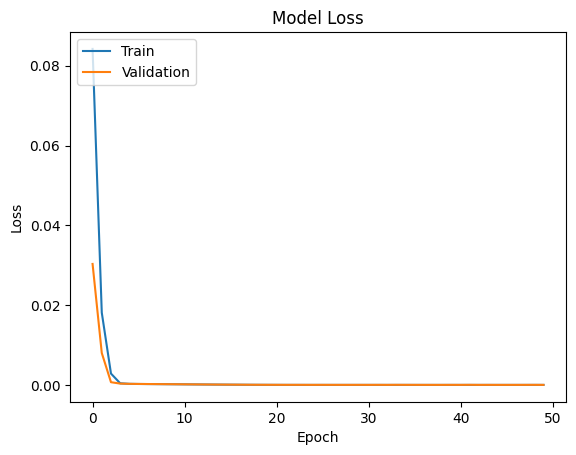

In [14]:
history = train_model()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()